In [1]:
#Reading the Iris data set
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

**Logistic Regression**

In [2]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
y_pred = logreg.predict(X)
len(y_pred)

(150L,)


150

In [14]:
#compute classification accuracy for the logistic regression model

from sklearn import metrics
print metrics.accuracy_score(y, y_pred) #training accuracy

0.946666666667


**kNN Algorithm**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y,  y_pred)

1.0


Note that the training accuracy is 100% in case of kNN Algorithm. This is because we trained our models using k = 1 and used 100% data. Hence, when we try to test using the same data again, it would give identical results.

**Train/test Split**

In [16]:
print X.shape
print y.shape

(150L, 4L)
(150L,)


In [7]:
#We divide our data set into training and testing data sets. One would be used to train the model, and other would be used to test this trained model.
from sklearn.cross_validation import train_test_split

#test_size = 0.4 implies that we are keeping 40% data for testing purposse and 60% for training.
#setting random_state value to any random integer would help recreate the train-test split of observation each time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)


In [8]:
print X_train.shape
print X_test.shape

(90L, 4L)
(60L, 4L)


In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#Print the testing accuracy using test data for Logistic Regression model
y_pred = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


In [18]:
#Print the testing accuracy using test data for kNN model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.966666666667


**Finding the best k Value**

In [19]:
k_range = range(1, 47)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

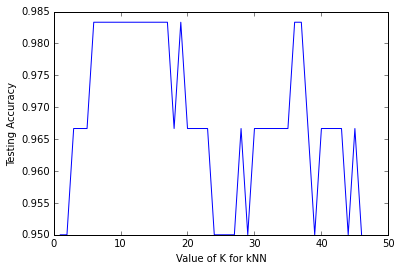

In [20]:
#Matplotlib is a scientific plotting library
import matplotlib.pyplot as plt

#Allow plots to appear within the notebook
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for kNN')
plt.ylabel('Testing Accuracy')